In [2]:

#importing required librabries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sb.set_theme(style="whitegrid")

In [3]:
#loading dataset
churndata = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [ ]:
churndata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
churndata.shape

(10002, 14)

In [4]:
# Data Cleaning

# Drop irrelevant columns: RowNumber, CustomerId, Surname
churndata = churndata.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(churndata.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [ ]:
#Checking for missing values
churndata.isnull().sum()

,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1
IsActiveMember,1
EstimatedSalary,0


In [ ]:
# Check for duplicate rows in the dataset
duplicate_rows = churndata[churndata.duplicated()]

In [ ]:
duplicate_rows

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

In [ ]:
num_duplicates

2

In [5]:
# Remove duplicate rows
churndata = churndata.drop_duplicates()

# Recheck the dataset for any remaining duplicate rows
remaining_duplicates = churndata[churndata.duplicated()]
num_remaining_duplicates = remaining_duplicates.shape[0]

# Display the count of remaining duplicates
num_remaining_duplicates

0

In [ ]:
# Create a crosstab of Gender and Exited
contingency_table = pd.crosstab(churndata['Gender'], churndata['Exited'])

# Display the crosstab
print(contingency_table)

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


In [7]:
# One-Hot Encoding for 'Geography'
churndata_encoded = pd.get_dummies(churndata, columns=['Geography'])

# Binary Encoding for 'Gender'
churndata_encoded['Gender'] = churndata_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Display the encoded dataframe
print("Encoded DataFrame Head:\n", churndata_encoded.head())

Encoded DataFrame Head:
    CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1  42.0       2       0.00              1        1.0   
1          608       1  41.0       1   83807.86              1        0.0   
2          502       1  42.0       8  159660.80              3        1.0   
3          699       1  39.0       1       0.00              2        0.0   
4          850       1  43.0       2  125510.82              1        0.0   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1.0        101348.88       1              True   
1             1.0        112542.58       0             False   
2             0.0        113931.57       1              True   
3             0.0         93826.63       0              True   
4             1.0         79084.10       0             False   

   Geography_Germany  Geography_Spain  
0              False            False  
1              False             True  
2      

In [8]:
# Check the original class distribution
original_class_distribution = churndata_encoded['Exited'].value_counts()
print("\nOriginal Class Distribution:\n", original_class_distribution)


Original Class Distribution:
 Exited
0    7963
1    2037
Name: count, dtype: int64


In [10]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
# Separate the majority and minority classes
majority_class = churndata_encoded[churndata_encoded['Exited'] == 0]
minority_class = churndata_encoded[churndata_encoded['Exited'] == 1]

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True,
                                n_samples=len(majority_class),
                                random_state=42)

# Combine the majority class with the oversampled minority class
data_balanced = pd.concat([majority_class, minority_oversampled])

# Check the new class distribution after oversampling
churndata_balanced_distribution = data_balanced['Exited'].value_counts()
print("\nNew Class Distribution After Oversampling:\n", churndata_balanced_distribution)


New Class Distribution After Oversampling:
 Exited
0    7963
1    7963
Name: count, dtype: int64


In [17]:
data_balanced.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1,608,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,False,True
3,699,1,39.0,1,0.00,2,0.0,0.0,93826.63,0,True,False,False
4,850,1,43.0,2,125510.82,1,0.0,1.0,79084.10,0,False,False,True
6,822,0,50.0,7,0.00,2,1.0,1.0,10062.80,0,True,False,False
8,501,0,44.0,4,142051.07,2,0.0,0.0,74940.50,0,True,False,False


In [20]:
data_balanced.shape

(15926, 13)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
churn_df=data_balanced

In [24]:
churn_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1,608,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,False,True
3,699,1,39.0,1,0.00,2,0.0,0.0,93826.63,0,True,False,False
4,850,1,43.0,2,125510.82,1,0.0,1.0,79084.10,0,False,False,True
6,822,0,50.0,7,0.00,2,1.0,1.0,10062.80,0,True,False,False
8,501,0,44.0,4,142051.07,2,0.0,0.0,74940.50,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5701,625,1,49.0,4,128504.76,1,1.0,0.0,126812.63,1,False,True,False
9337,466,1,47.0,5,102085.72,1,1.0,1.0,183536.24,1,False,True,False
4345,720,0,46.0,3,97042.60,1,1.0,1.0,133516.51,1,False,True,False
1085,803,0,42.0,5,0.00,1,1.0,0.0,196466.83,1,True,False,False


In [25]:
scaler=MinMaxScaler()
churn_df=pd.DataFrame(scaler.fit_transform(churn_df),columns=churn_df.columns)

In [27]:
churn_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.516,1.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0
1,0.698,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0
2,1.000,1.0,0.337838,0.2,0.500246,0.000000,0.0,1.0,0.395400,0.0,0.0,0.0,1.0
3,0.944,0.0,0.432432,0.7,0.000000,0.333333,1.0,1.0,0.050261,0.0,1.0,0.0,0.0
4,0.302,0.0,0.351351,0.4,0.566170,0.333333,0.0,0.0,0.374680,0.0,1.0,0.0,0.0


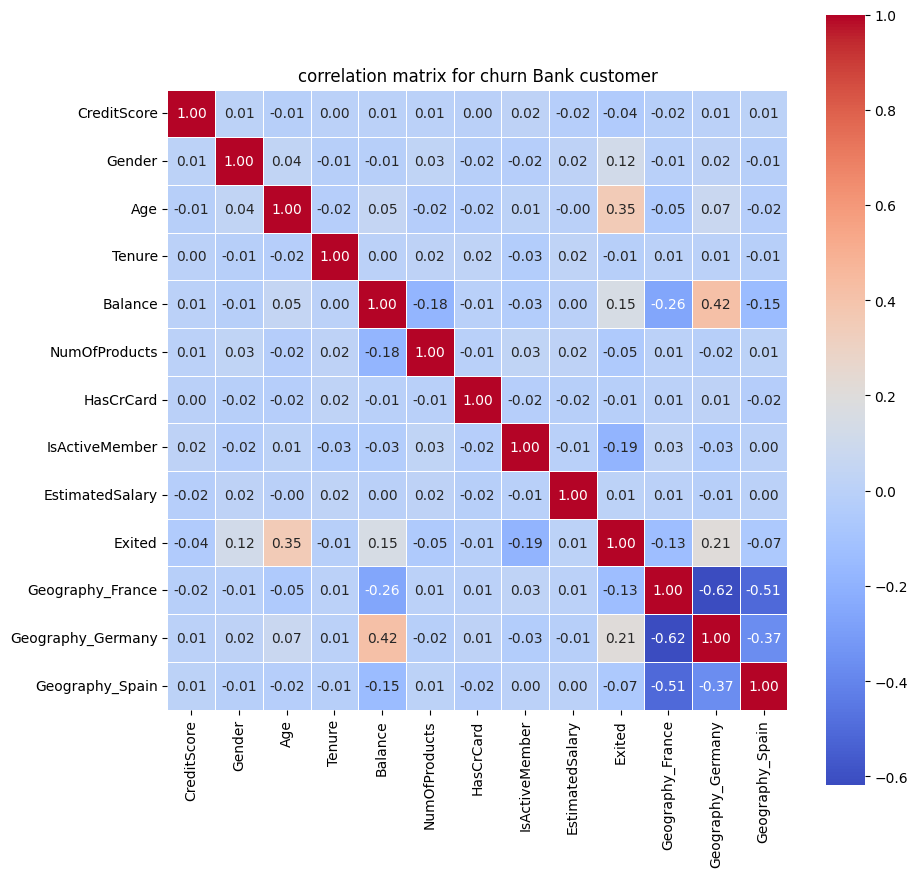

In [28]:
corr_matrix=churn_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=0.7,fmt=".2f", cmap='coolwarm', square=True)
plt.title("correlation matrix for churn Bank customer")
plt.show()

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [30]:
x=churn_df.drop("Exited",axis=1)
y=churn_df['Exited']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [32]:
model=Sequential([Dense(128,activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(32,activation="relu"),
                  Dense(1,activation="sigmoid")])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ["accuracy"]
)

In [34]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.3)

Epoch 1/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6228 - loss: 0.6463 - val_accuracy: 0.7139 - val_loss: 0.5534
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7335 - loss: 0.5339 - val_accuracy: 0.7632 - val_loss: 0.4949
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7655 - loss: 0.4822 - val_accuracy: 0.7632 - val_loss: 0.4714
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7757 - loss: 0.4636 - val_accuracy: 0.7830 - val_loss: 0.4528
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7797 - loss: 0.4605 - val_accuracy: 0.7848 - val_loss: 0.4525
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7853 - loss: 0.4586 - val_accuracy: 0.7743 - val_loss: 0.4632
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7973 - loss: 0.4309 - val_accuracy: 0.7776 - val_loss: 0.4577
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7937 - loss: 0.4331 - val_accuracy: 0.

In [35]:
y_pred=model.predict(x_test)

150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [36]:
print("ROC:", roc_auc_score(y_test,y_pred))

ROC: 0.8900498314421682
